# This is to get the final training and testing sets. 
The core here is data consistency: have all the estimates and their uncertainities; make sure the data has been standardized properly etc.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from astropy.table import Table
from astropy.io.misc.hdf5 import write_table_hdf5
import matplotlib.pyplot as plt

In [2]:
dataAll = pd.read_csv('../data/BINGO_full_info.csv')
dataAll.head()
len(dataAll)

3297

Step 1 is the training set. We are selecting only stars with SNR > 100 as our training set. We also make sure that the RC stars with mass greater than 1.2 solar masses are chosen.

In [3]:
mask = (dataAll['age']>=0) & (dataAll['age']<=20) & (dataAll['SNR']>=100) & \
((dataAll['evstate']==1) | ((dataAll['evstate']==2) & (dataAll['mass']>=1.2))) & (dataAll['dist'] > 0)
dataAll = dataAll[mask]

In [4]:
len(dataAll)

3046

In [5]:
nstars   = len(dataAll)  

print("The number of stars in the APOGEE-TGAS DR14 sample is:")
print(nstars) 

index  = dataAll['age']>=0
print("Found "+str(np.sum(index))+" stars with positive ages")
dataAge = dataAll[:][index]

index_g = dataAge['phot_g_mean_flux']>=0
print("Found "+str(np.sum(index_g))+" stars with good g fluxes")
dataAge = dataAge[:][index_g]

index_bp = dataAge['phot_bp_mean_flux']>=0
print("Found "+str(np.sum(index_bp))+" stars with good bp fluxes")
dataAge = dataAge[:][index_bp]

index_rp = dataAge['phot_rp_mean_flux']>=0
print("Found "+str(np.sum(index_rp))+" stars with good rp fluxes")
dataAge = dataAge[:][index_rp]

index_jerr = dataAge['J_ERR']>=0
print("Found "+str(np.sum(index_jerr))+" stars with good J err values")
dataAge = dataAge[:][index_jerr]

index_jerr = dataAge['H_ERR']>=0
print("Found "+str(np.sum(index_jerr))+" stars with good H err values")
dataAge = dataAge[:][index_jerr]

index_jerr = dataAge['K_ERR']>=0
print("Found "+str(np.sum(index_jerr))+" stars with good K err values")
data = dataAge[:][index_jerr]

The number of stars in the APOGEE-TGAS DR14 sample is:
3046
Found 3046 stars with positive ages
Found 3046 stars with good g fluxes
Found 3046 stars with good bp fluxes
Found 3046 stars with good rp fluxes
Found 3042 stars with good J err values
Found 3039 stars with good H err values
Found 3036 stars with good K err values


In [6]:
# Get the final features: logg, teff, alpham, mh, cfe, nfe, gmag, bpmag, rpmag, j, h, k & their errors
# Get the final targets: age and distance and their errors

g_mag = data['phot_g_mean_mag']
g_flux = data['phot_g_mean_flux']
g_flux_error = data['phot_g_mean_flux_error']
gmagErr = 0.5 * 2.5 * (np.log10(g_flux + g_flux_error) - np.log10(g_flux - g_flux_error ))

bp_mag = data['phot_bp_mean_mag']
bp_flux = data['phot_bp_mean_flux']
bp_flux_error = data['phot_bp_mean_flux_error']
bpmagErr = 0.5 * 2.5 * (np.log10(bp_flux + bp_flux_error) - np.log10(bp_flux - bp_flux_error ))

rp_mag = data['phot_rp_mean_mag']
rp_flux = data['phot_rp_mean_flux']
rp_flux_error = data['phot_rp_mean_flux_error']
rpmagErr = 0.5 * 2.5 * (np.log10(rp_flux + rp_flux_error) - np.log10(rp_flux - rp_flux_error ))

data['G'] = g_mag
data['G_ERR'] = gmagErr

data['BP'] = bp_mag
data['BP_ERR'] = bpmagErr

data['RP'] = rp_mag
data['RP_ERR'] = rpmagErr

In [7]:
min(data.dist)

190.4085

In [8]:
# Target 1: age and age uncertainty
age = data['age']
age_68u = data['age_68U']
age_68l = data['age_68L']
ageErr = (age_68u - age_68l)/2.0
data['ageErr'] = ageErr

logAge = np.log10(age)
logAgeErr = (np.log10(age_68u) - np.log10(age_68l))/2.0

data['logAge'] = logAge
data['logAgeErr'] = logAgeErr

3036

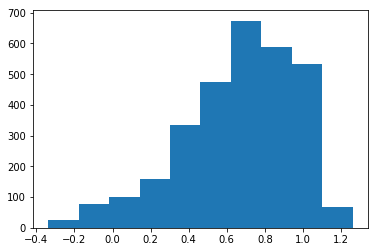

In [9]:
plt.hist(logAge)
len(logAge)

In [10]:
dist = data['dist']
dist_68u = data['dist_68U']
dist_68l = data['dist_68L']
dist_err = (dist_68u - dist_68l)/2.0

# This is distance in kpc
# Make sure you change this in the distance modulus

dist_kpc = dist/1000
logDistKpc = np.log10(dist_kpc)

dist_68u_kpc = dist_68u/1000
dist_68l_kpc = dist_68l/1000
dist_kpc_err = dist_err/1000

logDistKpcErr = (np.log10(dist_68u_kpc) - np.log10(dist_68l_kpc))/2.0

data['distKpc'] = dist_kpc
data['distKpc_68u'] = dist_68u_kpc
data['distKpc_68l'] = dist_68l_kpc
data['distErrKpc'] = dist_kpc_err

# Get the log(distance) error
# Also make sure you save an APOGEE id etc. Done

data['logDistKpc'] = logDistKpc
data['logDistKpcErr'] = logDistKpcErr

In [11]:
feats = ['APOGEE_ID_1', 'source_id', 'LOGG', 'TEFF', 'ALPHA_M', 'M_H', 'C_FE', 'N_FE', \
           'G', 'BP', 'RP', 'J', 'H', 'K', 'LOGG_ERR', 'TEFF_ERR', 'ALPHA_M_ERR', 'M_H_ERR', 'C_FE_ERR', 'N_FE_ERR', \
           'G_ERR', 'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR', \
           'age', 'age_68U', 'age_68L', 'ageErr', 'logAge', 'logAgeErr', \
           'distKpc', 'distKpc_68u','distKpc_68l', 'distErrKpc', 'logDistKpc', 'logDistKpcErr']

dataOfInterest = data[feats]

(array([  19.,  509.,  542.,  801., 1006.,  114.,   32.,    6.,    2.,
           5.]),
 array([0.001128  , 0.00244201, 0.00375602, 0.00507004, 0.00638405,
        0.00769806, 0.00901207, 0.01032609, 0.0116401 , 0.01295411,
        0.01426812]),
 <a list of 10 Patch objects>)

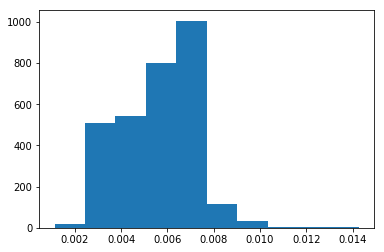

In [12]:
plt.hist(dataOfInterest['logDistKpcErr'])

In [13]:
dataOfInterest.to_csv('../train_data/AllOriginal.csv')

In [14]:
dataOfInterest.head(5)

,APOGEE_ID_1,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,G,BP,...,age_68L,ageErr,logAge,logAgeErr,distKpc,distKpc_68u,distKpc_68l,distErrKpc,logDistKpc,logDistKpcErr
0,2M19252021+3647118,2050240782362231552,2.822838,4636.0260,0.022572,0.275174,0.020502,0.419455,12.049109,12.669947,...,4.8417,1.35930,0.779149,0.096771,1.232919,1.251669,1.214507,0.018581,0.090935,0.006545
1,2M19241746+3651460,2050255316531404032,2.432568,4776.1060,-0.005595,0.057919,-0.088357,0.342604,12.584685,13.218509,...,4.1697,0.96185,0.692732,0.082377,2.255723,2.272414,2.238463,0.016976,0.353286,0.003269
2,2M19261297+3648265,2051694027492941696,2.526513,4933.1810,0.005142,0.028102,-0.203984,0.408586,11.720373,12.297697,...,1.7069,0.13250,0.278022,0.031338,1.634047,1.646224,1.620317,0.012954,0.213265,0.003444
3,2M19250718+3654252,2050245627085389184,2.775030,4803.0825,0.004583,-0.008960,-0.141116,0.373124,11.912818,12.497253,...,3.2810,0.95270,0.618707,0.099430,1.268516,1.286735,1.249425,0.018655,0.103296,0.006390
4,2M19252149+3654097,2050244733732234112,2.930188,4818.7980,-0.011045,0.106488,-0.209060,0.382780,10.622860,11.168686,...,3.2734,0.94180,0.612455,0.098699,0.638877,0.649120,0.630231,0.009445,-0.194583,0.006413


In [15]:
len(dataOfInterest)

3036